<a href="https://colab.research.google.com/github/simoneminorr/DS-3001-Project/blob/main/Copy_of_lab_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in `pierce_county_house_sales.csv`, car prices in `cars_hw.csv`, and airbnb rental prices in `airbnb_hw.csv`.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an 80/20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities?
6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?
8. Use the `sklearn.linear_model.Lasso` to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

In [ ]:
! git clone https://github.com/ds3001f25/lab_hedonic_pricing.git

fatal: destination path 'lab_hedonic_pricing' already exists and is not an empty directory.


1. Clean the data and perform some EDA and visualization to get to know the data set.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
housesales = pd.read_csv('lab_hedonic_pricing/data/pierce_county_house_sales.csv')
cars = pd.read_csv('lab_hedonic_pricing/data/cars_hw.csv')
airbnb = pd.read_csv('lab_hedonic_pricing/data/airbnb_hw.csv')

In [ ]:
housesales.head()

,sale_date,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,hvac_description,exterior,interior,stories,roof_cover,year_built,bedrooms,bathrooms,waterfront_type,view_quality,utility_sewer
0,2020-01-02,380000,2157,0,0,528,0,0,Warm and Cool Air Zone,Frame Siding,Drywall,2,Composition Shingle,1993,3,3,NaN,NaN,SEWER/SEPTIC INSTALLED
1,2020-01-02,383000,2238,0,0,396,0,0,Forced Air,Frame Siding,Drywall,2,Composition Shingle,2017,4,3,NaN,NaN,SEWER/SEPTIC INSTALLED
2,2020-01-01,419900,1452,0,0,0,0,1,Forced Air,Frame Siding,Drywall,1,Built Up Rock,1965,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED
3,2020-01-02,251660,832,0,0,0,0,0,Forced Air,Frame Vinyl,Drywall,1,Composition Shingle,1919,2,1,NaN,NaN,SEWER/SEPTIC INSTALLED
4,2020-01-02,500000,1780,0,384,484,0,1,Forced Air,Frame Siding,Drywall,1,Composition Shingle,1955,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED


In [ ]:
housesales.describe()

,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,stories,year_built,bedrooms,bathrooms
count,1.681400e+04,16814.000000,16814.000000,16814.000000,16814.000000,16814.000000,16814.000000,16814.000000,16814.000000,16814.000000,16814.000000
mean,4.612332e+05,1879.941953,24.945878,167.852861,364.425122,38.298501,0.889021,1.558285,1980.469252,3.277983,2.317176
std,2.360833e+05,760.419008,102.066417,429.065832,286.454018,164.691471,0.596731,0.512055,33.339025,0.891240,0.827956
min,2.000000e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1880.000000,0.000000,0.000000
25%,3.480000e+05,1320.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1959.000000,3.000000,2.000000
50%,4.165000e+05,1774.000000,0.000000,0.000000,420.000000,0.000000,1.000000,2.000000,1990.000000,3.000000,2.000000
75%,5.238065e+05,2352.000000,0.000000,0.000000,528.000000,0.000000,1.000000,2.000000,2006.000000,4.000000,3.000000
max,6.130000e+06,9510.000000,1212.000000,4000.000000,2816.000000,3664.000000,5.000000,3.000000,2021.000000,25.000000,8.000000


In [ ]:
housesales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16814 entries, 0 to 16813
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   sale_date                    16814 non-null  object
 1   sale_price                   16814 non-null  int64 
 2   house_square_feet            16814 non-null  int64 
 3   attic_finished_square_feet   16814 non-null  int64 
 4   basement_square_feet         16814 non-null  int64 
 5   attached_garage_square_feet  16814 non-null  int64 
 6   detached_garage_square_feet  16814 non-null  int64 
 7   fireplaces                   16814 non-null  int64 
 8   hvac_description             16807 non-null  object
 9   exterior                     16813 non-null  object
 10  interior                     16807 non-null  object
 11  stories                      16814 non-null  int64 
 12  roof_cover                   16806 non-null  object
 13  year_built                   16

In [ ]:
housesales.isnull().sum()
#large portion of waterfront type and view quality has missing data

,0
sale_date,0
sale_price,0
house_square_feet,0
attic_finished_square_feet,0
basement_square_feet,0
attached_garage_square_feet,0
detached_garage_square_feet,0
fireplaces,0
hvac_description,7
exterior,1


In [ ]:
cars.info()
cars.isnull().sum()
#seems to have no missing data and the variables are typed right

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         976 non-null    int64 
 1   Make               976 non-null    object
 2   Make_Year          976 non-null    int64 
 3   Color              976 non-null    object
 4   Body_Type          976 non-null    object
 5   Mileage_Run        976 non-null    int64 
 6   No_of_Owners       976 non-null    object
 7   Seating_Capacity   976 non-null    int64 
 8   Fuel_Type          976 non-null    object
 9   Transmission       976 non-null    object
 10  Transmission_Type  976 non-null    object
 11  Price              976 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 91.6+ KB


,0
Unnamed: 0,0
Make,0
Make_Year,0
Color,0
Body_Type,0
Mileage_Run,0
No_of_Owners,0
Seating_Capacity,0
Fuel_Type,0
Transmission,0


In [ ]:
airbnb.info()
airbnb.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Host Id                     30478 non-null  int64  
 1   Host Since                  30475 non-null  object 
 2   Name                        30478 non-null  object 
 3   Neighbourhood               30478 non-null  object 
 4   Property Type               30475 non-null  object 
 5   Review Scores Rating (bin)  22155 non-null  float64
 6   Room Type                   30478 non-null  object 
 7   Zipcode                     30344 non-null  float64
 8   Beds                        30393 non-null  float64
 9   Number of Records           30478 non-null  int64  
 10  Number Of Reviews           30478 non-null  int64  
 11  Price                       30478 non-null  object 
 12  Review Scores Rating        22155 non-null  float64
dtypes: float64(4), int64(3), object

,0
Host Id,0
Host Since,3
Name,0
Neighbourhood,0
Property Type,3
Review Scores Rating (bin),8323
Room Type,0
Zipcode,134
Beds,85
Number of Records,0


In [ ]:
housesales_clean = housesales.dropna(axis='columns',how='all')
cars_clean = cars.dropna(axis='columns',how='all')
airbnb_clean = airbnb.dropna(axis='columns',how='all')

In [ ]:
# Cleaning housesales dataset
#these two columns had the bulk of their data missing
housesales_clean = housesales.drop(columns=['waterfront_type', 'view_quality'])

for col in housesales_clean.select_dtypes(include='object').columns:
    housesales_clean[col].fillna(housesales_clean[col].mode()[0], inplace=True)

display(housesales_clean.isnull().sum())

/tmp/ipython-input-1030490981.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housesales_clean[col].fillna(housesales_clean[col].mode()[0], inplace=True)


,0
sale_date,0
sale_price,0
house_square_feet,0
attic_finished_square_feet,0
basement_square_feet,0
attached_garage_square_feet,0
detached_garage_square_feet,0
fireplaces,0
hvac_description,0
exterior,0


In [ ]:
# Cleaning airbnb dataset
airbnb_clean = airbnb.dropna(subset=['Host Since', 'Property Type', 'Zipcode', 'Beds'])

#filling in missing numerical numbers with mean
for col in airbnb_clean.select_dtypes(include=np.number).columns:
    airbnb_clean[col].fillna(airbnb_clean[col].mean(), inplace=True)

#filling in missing object data with whatever appears most
for col in airbnb_clean.select_dtypes(include='object').columns:
    airbnb_clean[col].fillna(airbnb_clean[col].mode()[0], inplace=True)

display(airbnb_clean.isnull().sum())

/tmp/ipython-input-905745064.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airbnb_clean[col].fillna(airbnb_clean[col].mean(), inplace=True)
/tmp/ipython-input-905745064.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_clean[col].fillna(airbnb_clean[col].mean(), inplace=True)
/tmp/ipython-input-905745064.py:10: FutureWarning: A 

,0
Host Id,0
Host Since,0
Name,0
Neighbourhood,0
Property Type,0
Review Scores Rating (bin),0
Room Type,0
Zipcode,0
Beds,0
Number of Records,0


2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.

In [ ]:
# Cleaning housesales dataset
# these two columns had the bulk of their data missing
housesales_clean = housesales.drop(columns=['waterfront_type', 'view_quality'])

for col in housesales_clean.select_dtypes(include='object').columns:
    housesales_clean[col] = housesales_clean[col].fillna(housesales_clean[col].mode()[0])

display(housesales_clean.isnull().sum())

,0
sale_date,0
sale_price,0
house_square_feet,0
attic_finished_square_feet,0
basement_square_feet,0
attached_garage_square_feet,0
detached_garage_square_feet,0
fireplaces,0
hvac_description,0
exterior,0


In [ ]:
categorical_cols = housesales_clean.select_dtypes(include='object').columns
housesales_encoded = pd.get_dummies(housesales_clean, columns=categorical_cols, drop_first=True)
display(housesales_encoded.head())

,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,stories,year_built,bedrooms,...,interior_Paneling,roof_cover_Composition Shingle,roof_cover_Concrete Tile,roof_cover_Formed Seam Metal,roof_cover_Preformed Metal,roof_cover_Wood Shake,utility_sewer_SEWER/SEPTIC AVAIL,utility_sewer_SEWER/SEPTIC INSTALLED,utility_sewer_SEWER/SEPTIC NO,utility_sewer_SEWER/SEPTIC NO PERC
0,380000,2157,0,0,528,0,0,2,1993,3,...,False,True,False,False,False,False,False,True,False,False
1,383000,2238,0,0,396,0,0,2,2017,4,...,False,True,False,False,False,False,False,True,False,False
2,419900,1452,0,0,0,0,1,1,1965,3,...,False,False,False,False,False,False,False,True,False,False
3,251660,832,0,0,0,0,0,1,1919,2,...,False,True,False,False,False,False,False,True,False,False
4,500000,1780,0,384,484,0,1,1,1955,3,...,False,True,False,False,False,False,False,True,False,False


3. Implement an 80/20 train-test split. Put the test data aside.

In [ ]:
from sklearn.model_selection import train_test_split

# Defining features (X) and target (y)
X = housesales_encoded.drop('sale_price', axis=1)
y = housesales_encoded['sale_price']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (13451, 404)
Testing set shape: (3363, 404)


Q4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Creating simple linear regression model
model = LinearRegression()

#Training model
model.fit(X_train, y_train)

#Making predictions on training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#Evaluating model on the training set
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

#Evaluating model on the testing set
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print("Training set performance:")
print(f"RMSE: {rmse_train}")
print(f"R-squared: {r2_train}")

print("\nTesting set performance:")
print(f"RMSE: {rmse_test}")
print(f"R-squared: {r2_test}")

Training set performance:
RMSE: 169119.44592118284
R-squared: 0.4619935436110487

Testing set performance:
RMSE: 198941.02323911648
R-squared: 0.40037890649682595


Between all of the models, the training set model does the best because its RMSE is lower which means the model's predictions are closer to the actual values than the testing set's performance. In addition, it has a higher R-squared which means the data is modelled accounts for the variance and explains it well. In short, the training RMSE (169119.44592118284) is less than the testing set RMSE (198941.02323911648) and the testing R-squared (198941.02323911648) is greater than the testing set's (0.40037890649682595) which both demonstrate the train model performs better.

Q5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities?

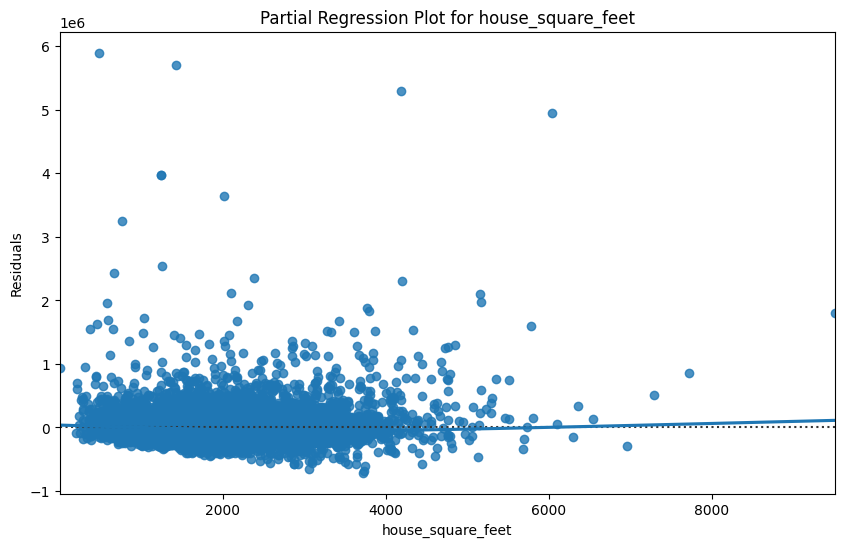

/usr/local/lib/python3.12/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


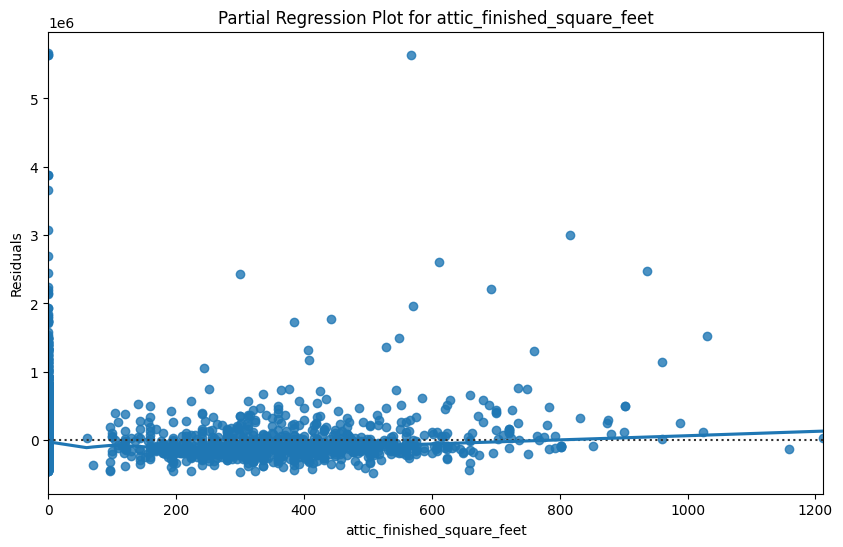

/usr/local/lib/python3.12/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


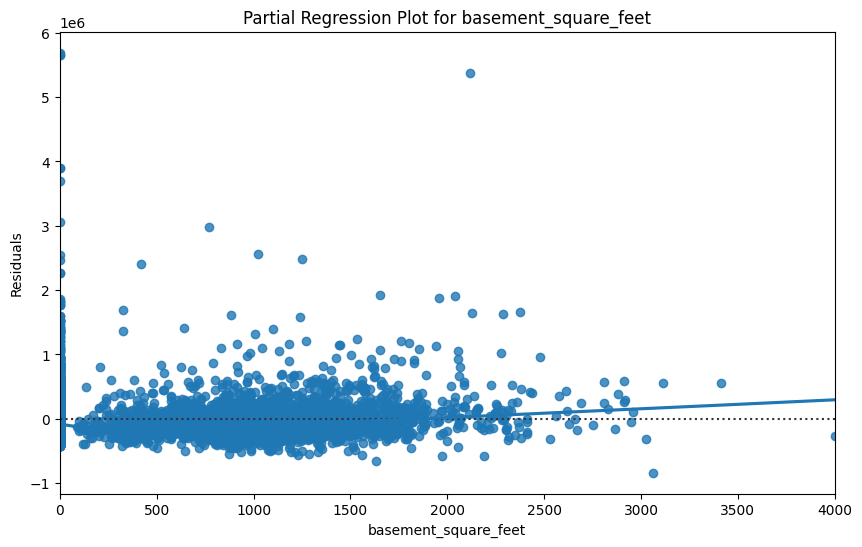

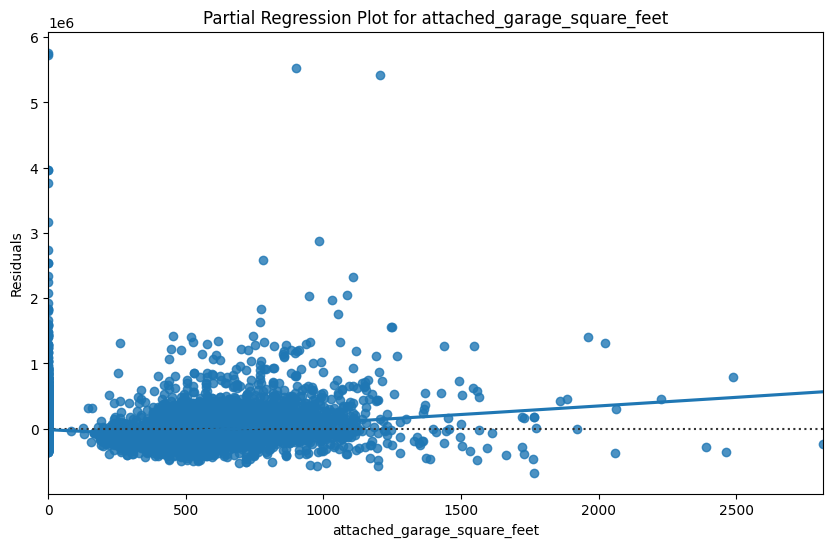

/usr/local/lib/python3.12/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


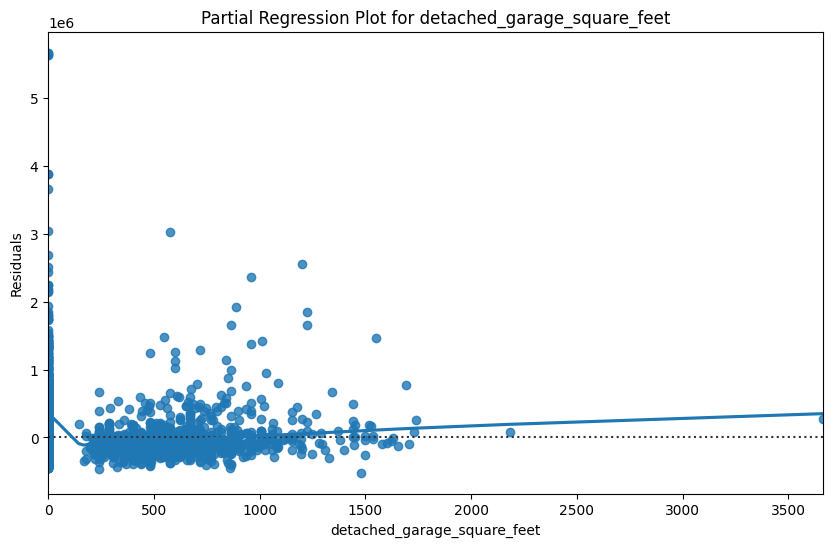

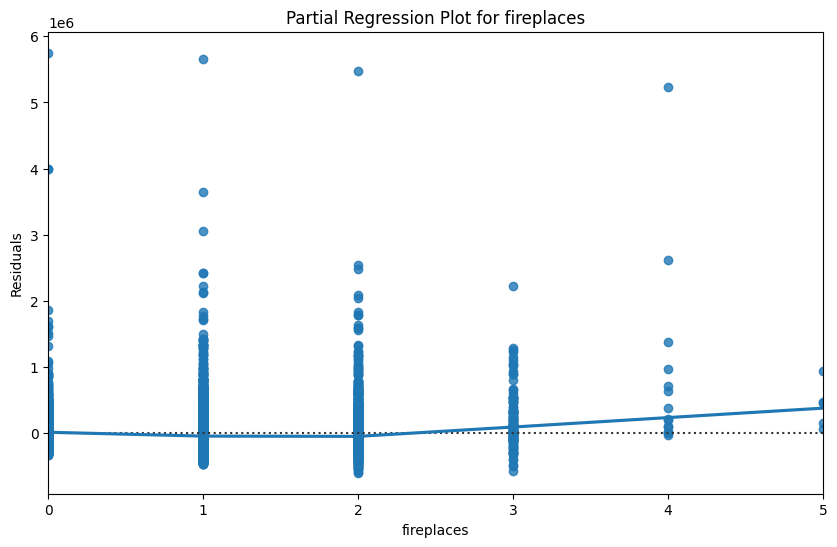

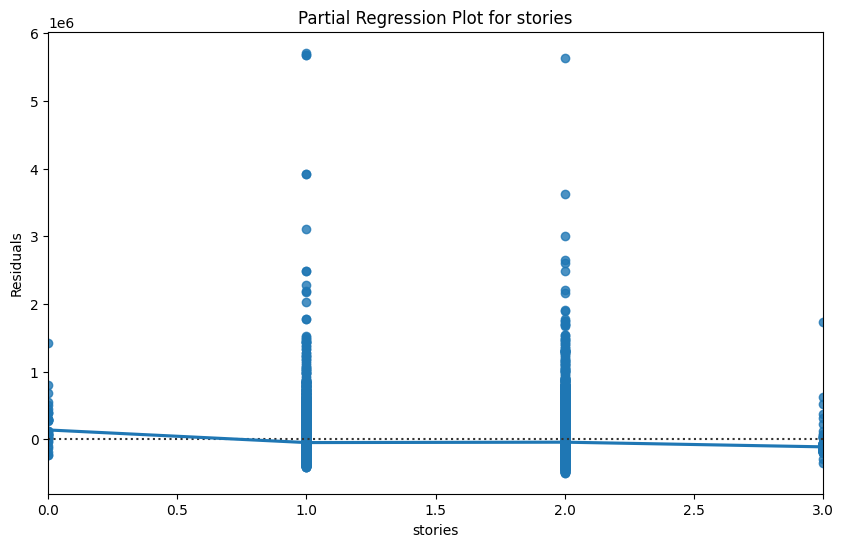

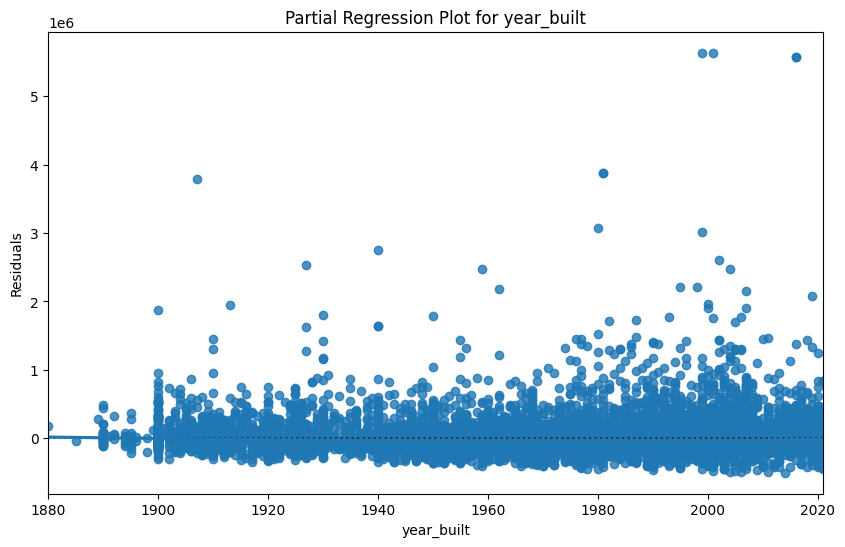

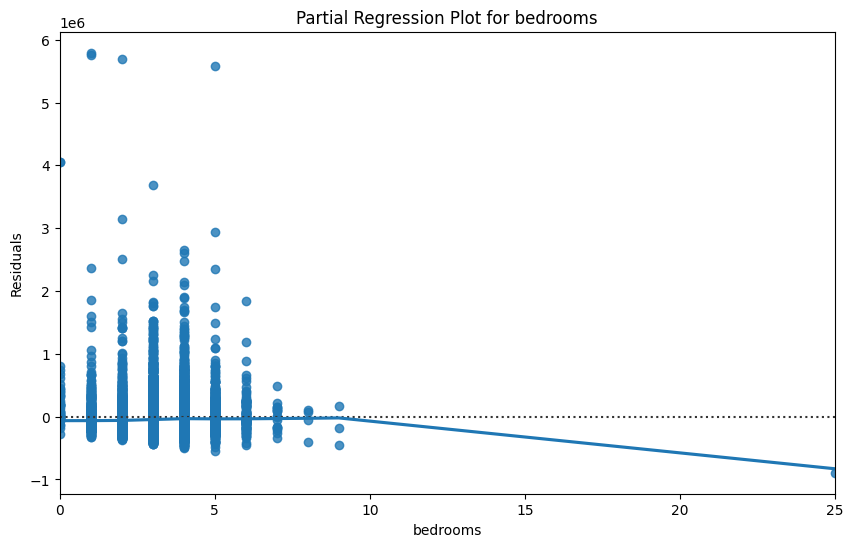

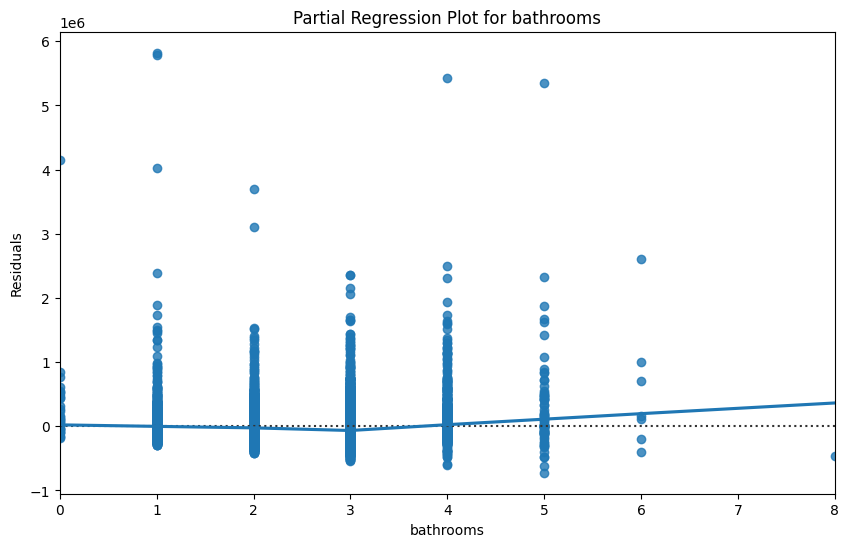

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Selecting only the numerical columns from the original housesales_clean dataframe
numerical_housesales = housesales_clean.select_dtypes(include=np.number).copy()

# Removing the target variable 'sale_price' from the numerical features
numerical_features = numerical_housesales.drop('sale_price', axis=1)

# Creating partial regression plots for each numerical feature
for col in numerical_features.columns:
    # Drop rows with NaN or infinite values in the current column and the target variable
    temp_df = numerical_housesales.dropna(subset=[col, 'sale_price']).replace([np.inf, -np.inf], np.nan).dropna(subset=[col, 'sale_price'])

    if not temp_df.empty:
        plt.figure(figsize=(10, 6))
        sns.residplot(data=temp_df, x=col, y='sale_price', lowess=True)
        plt.xlabel(col)
        plt.ylabel('Residuals')
        plt.title(f'Partial Regression Plot for {col}')
        plt.show()
    else:
        print(f"Skipping plot for {col} due to no valid data after handling NaNs and infinite values.")

What is significant and identifiable from these plots are that all of them seem to be nonlinear. Because all of them fall in line with the trend lines for the non-linear graphs for the most part, it seems that the sq. feet of the homes and basements, year built, bedrooms, and bathrooms are all nonlinear. Therefore, a simple linear model may not capture the full relationship between these features and the sale price. Perhaps a complex model could account for more of these terms at once to get a more accurate prediction that accounts for variance.

Q6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting numerical features for transformations and interactions
# Excluding the 'sale_date' and any other non-numeric columns that might have been missed
numerical_features_for_complex_model = housesales_clean.select_dtypes(include=np.number).drop('sale_price', axis=1)


# Adding polynomial features (ex. degree 2) to selected numerical features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(numerical_features_for_complex_model)
poly_feature_names = poly.get_feature_names_out(numerical_features_for_complex_model.columns)
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names, index=housesales_clean.index)

# Combining polynomial features with the one-hot encoded categorical features
# Making the indices align
X_complex = pd.concat([poly_df, housesales_encoded.drop(['sale_price'] + list(numerical_features_for_complex_model.columns), axis=1)], axis=1)


# Splitting the complex feature set into training and testing sets
# Using the same random_state as before for reproducibility
X_train_complex, X_test_complex, y_train_complex, y_test_complex = train_test_split(X_complex, y, test_size=0.2, random_state=42)


# Creating and training a complex linear regression model
complex_model = LinearRegression()
complex_model.fit(X_train_complex, y_train_complex)

# Making predictions on the training and testing sets
y_train_pred_complex = complex_model.predict(X_train_complex)
y_test_pred_complex = complex_model.predict(X_test_complex)

# Evaluating complex model on the training set
rmse_train_complex = np.sqrt(mean_squared_error(y_train_complex, y_train_pred_complex))
r2_train_complex = r2_score(y_train_complex, y_train_pred_complex)

# Evaluating complex model on the testing set
rmse_test_complex = np.sqrt(mean_squared_error(y_test_complex, y_test_pred_complex))
r2_test_complex = r2_score(y_test_complex, y_test_pred_complex)

print("Complex Model Training set performance:")
print(f"RMSE: {rmse_train_complex}")
print(f"R-squared: {r2_train_complex}")

print("\nComplex Model Testing set performance:")
print(f"RMSE: {rmse_test_complex}")
print(f"R-squared: {r2_test_complex}")

Complex Model Training set performance:
RMSE: 160706.52980216412
R-squared: 0.5141888928699647

Complex Model Testing set performance:
RMSE: 216890.2454172956
R-squared: 0.2872975566713969


This compares to the complex model we had done earlier by performing better in the R^2 in the training and worse in that of the testing model. The simple model showed similarity between the testing and training, but here in the complex model, there is a further distinction between the two because the complex model for the training set has a similarly quality modelled accuracy of predictions, but a higher R-squared which means that the variance is better accounted for. On the other hand, the RMSE is higher for the complex model testing set which means the predictions are worse for the complex model and the R-squared is lower which further reinforces that the mdoel is worse than the simple model because the variance is not well accounted for in the model.

Q7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?

Looking back at the results from Questions 1 through 6, there’s a clear pattern showing how model complexity affects performance. In the simpler model (Q4), the training RMSE was about 169,119 with an R² of 0.46, and the test RMSE was 198,941 with an R² of 0.40. The gap between training and testing performance wasn’t too large, which suggests that while the model wasn’t perfect, it worked reasonably well.
When I moved to the more complex model in Q6, things changed. The training performance improved—RMSE dropped to 160,707 and R² went up to 0.51—but the testing results actually got worse (RMSE 216,890, R² 0.29). This means the model fit the training data really well but didn’t perform as well on new data. Basically, it started to overfit.
So overall, what we learned here is that adding more complexity doesn’t always make a model “better.” In fact, it can make it worse if it starts learning noise instead of useful patterns. The simpler model ended up being more balanced and reliable. This was a good reminder that good model selection is about finding the middle ground, it needs enough complexity to capture meaningful patterns, but not so much that the model loses its ability to generalize and be digestable.